In [2]:
import pandas as pd
import numpy as np
from scaling import standardize, normalize
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from statistics import mean
from collections import Counter

import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

from RandomForest import evaluate_rfc, create_roc_curve

In [3]:
df2015 = pd.read_csv('../data/kaasa/kaasa_2015.csv', index_col=None, header=0)
df2016 = pd.read_csv('../data/kaasa/kaasa_2016.csv', index_col=None, header=0)
df2017 = pd.read_csv('../data/kaasa/kaasa_2017.csv', index_col=None, header=0)
df2018 = pd.read_csv('../data/kaasa/kaasa_2018.csv', index_col=None, header=0)
df2019 = pd.read_csv('../data/kaasa/kaasa_2019.csv', index_col=None, header=0)
df2020 = pd.read_csv('../data/kaasa/kaasa_2020.csv', index_col=None, header=0)
df2021 = pd.read_csv('../data/kaasa/kaasa_2021.csv', index_col=None, header=0)

all_files = [df2015, df2016, df2017, df2018, df2019, df2020, df2021]

df = pd.concat(all_files, axis=0, ignore_index=True)

In [4]:
df = df.drop(columns=['source_id', 'individual', 'owner_id', 'name',  'distance', 'sin_time', 'cos_time', 'date_time',
                      'longitude', 'latitude', 'temperature', 'altitude'])

df = standardize(df, ['velocity', 'angle']) # standarize the data
df = normalize(df, ['velocity', 'angle'], 0, 1) # normalize the data

X = df.drop(['attack'], axis=1) # Features
y = df['attack'] # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('attack', axis=1), df['attack'], test_size=0.1, random_state=42, stratify=y)

# Use SMOTE to oversample the minority class
oversample = SMOTE()
X_train_resampled, y_train_resampled = oversample.fit_resample(X_train, y_train)

# Fine-tuning of RFC
Manually and empirically try to optimize the RFC by tuning the hyperparameters. The parameterss to start with are suggested by the grid search. One should also fine-tune them after doing a grid search, wchich is done in this section. The params to tune and their initial values:

* n_estimators: 100
* max-depth: 100
* class_weight: {0: 1, 1: 100}

## Tuning of class_weight

### n_estimators=100, max_depth=100, class_weight=None

roc_auc_score for RandomForestClassifier:  0.5029363594714678
Best threshold: 1


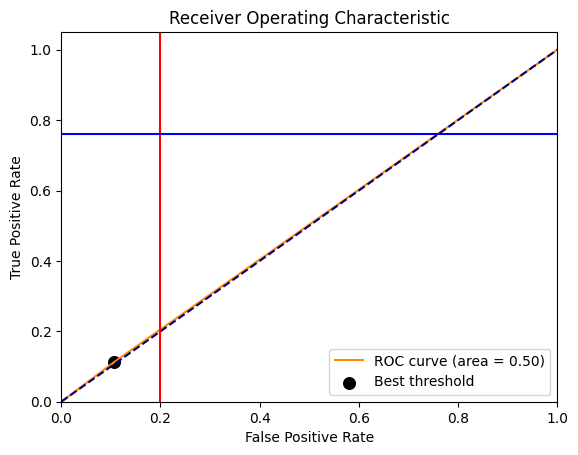

Accuracy: 88.27 %
[[21103  2508]
 [  301    38]]
              precision    recall  f1-score   support

           0      0.986     0.894     0.938     23611
           1      0.015     0.112     0.026       339

    accuracy                          0.883     23950
   macro avg      0.500     0.503     0.482     23950
weighted avg      0.972     0.883     0.925     23950



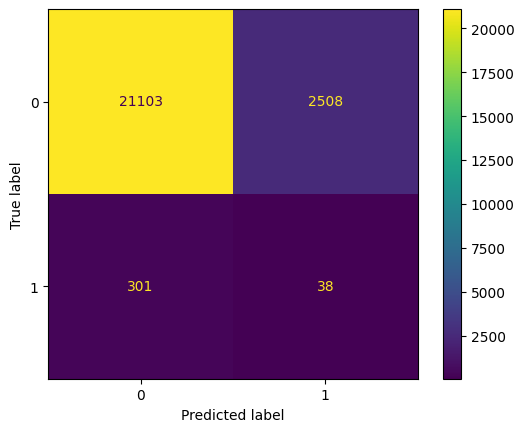

In [20]:
# Build SMOTE SRF model
rf = RandomForestClassifier(n_estimators=100, max_depth=100, class_weight=None, random_state=42, n_jobs=-1)

# Train SMOTE SRF
rf.fit(X_train_resampled, y_train_resampled)

# SMOTE SRF prediction result
y_pred = rf.predict(X_test)

create_roc_curve(y_test=y_test, y_pred=y_pred)
evaluate_rfc(rf, y_test=y_test, y_pred=y_pred)

### n_estimators=100, max_depth=100, class_weight={0: 1, 1: 100}
This is what the grid search suggested

roc_auc_score for RandomForestClassifier:  0.5078162158555916
Best threshold: 1


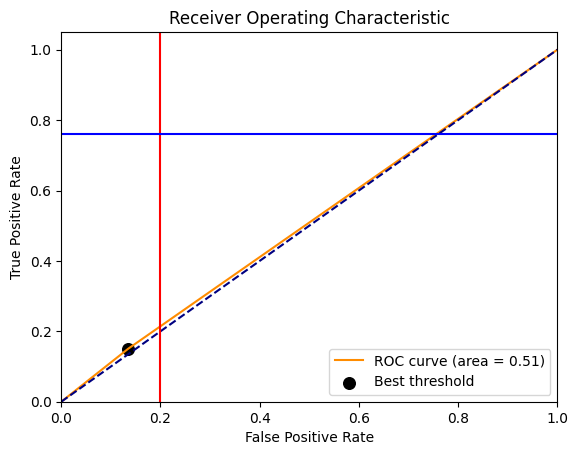

Accuracy: 85.51 %
[[20428  3183]
 [  288    51]]
              precision    recall  f1-score   support

           0      0.986     0.865     0.922     23611
           1      0.016     0.150     0.029       339

    accuracy                          0.855     23950
   macro avg      0.501     0.508     0.475     23950
weighted avg      0.972     0.855     0.909     23950



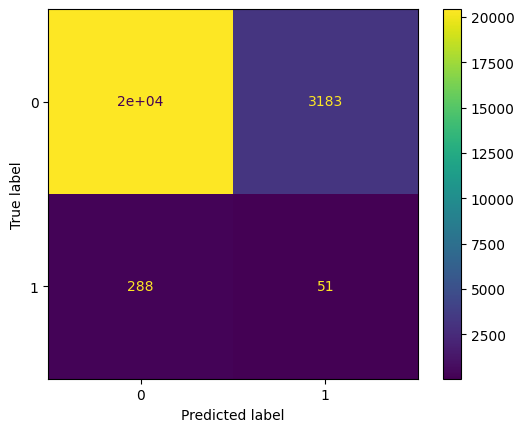

In [11]:
# Build SMOTE SRF model
rf = RandomForestClassifier(n_estimators=100, max_depth=100, class_weight={0: 1, 1: 100}, random_state=42, n_jobs=-1)

# Train SMOTE SRF
rf.fit(X_train_resampled, y_train_resampled)

# SMOTE SRF prediction result
y_pred = rf.predict(X_test)

# Performance matrix
create_roc_curve(y_test=y_test, y_pred=y_pred)
evaluate_rfc(rf, y_test=y_test, y_pred=y_pred)


### n_estimators=100, max_depth=100, class_weight={0: 1, 1: 75}
Try to give less weight to the minority class (attack instances)

roc_auc_score for RandomForestClassifier:  0.49793013081123505
Best threshold: 2


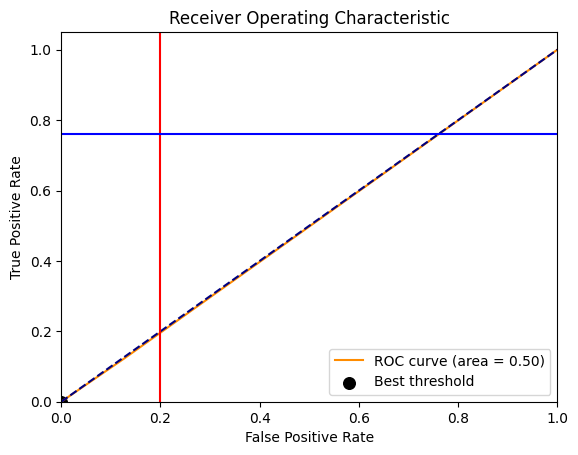

Accuracy: 86.14 %
[[20588  3023]
 [  297    42]]
              precision    recall  f1-score   support

           0      0.986     0.872     0.925     23611
           1      0.014     0.124     0.025       339

    accuracy                          0.861     23950
   macro avg      0.500     0.498     0.475     23950
weighted avg      0.972     0.861     0.913     23950



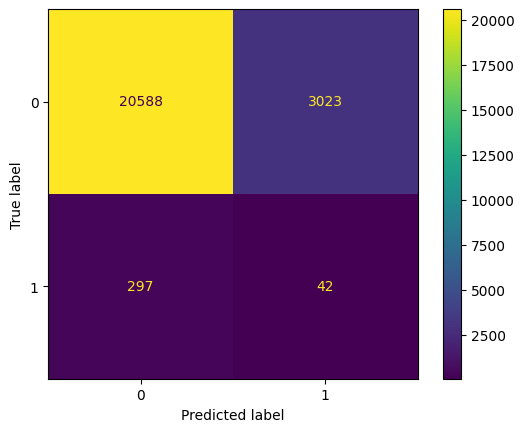

In [14]:
# Build SMOTE SRF model
rf = RandomForestClassifier(n_estimators=100, max_depth=100, class_weight={0: 1, 1: 75}, random_state=42, n_jobs=-1)

# Train SMOTE SRF
rf.fit(X_train_resampled, y_train_resampled)

# SMOTE SRF prediction result
y_pred = rf.predict(X_test)

# Performance matrix
create_roc_curve(y_test=y_test, y_pred=y_pred)
evaluate_rfc(rf, y_test=y_test, y_pred=y_pred)

### n_estimators=100, max_depth=100, class_weight='balanced_subsamples'

roc_auc_score for RandomForestClassifier:  0.507099585726317
Best threshold: 1


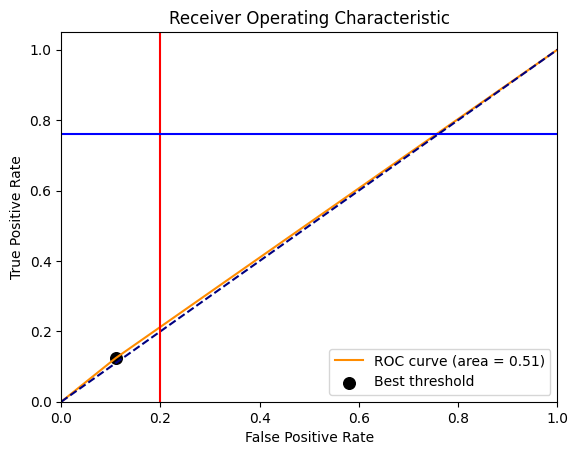

Accuracy: 87.95 %
[[21021  2590]
 [  297    42]]
              precision    recall  f1-score   support

           0      0.986     0.890     0.936     23611
           1      0.016     0.124     0.028       339

    accuracy                          0.879     23950
   macro avg      0.501     0.507     0.482     23950
weighted avg      0.972     0.879     0.923     23950



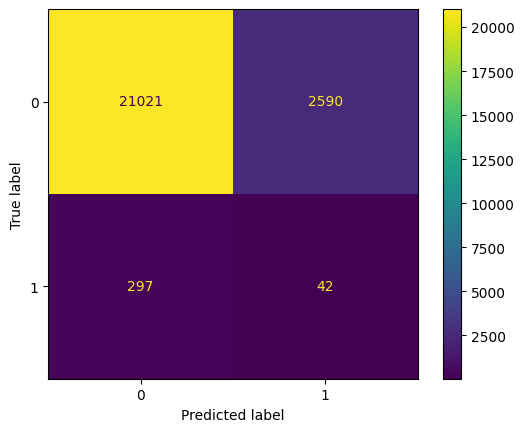

In [13]:
# Build SMOTE SRF model
rf = RandomForestClassifier(n_estimators=100, max_depth=100, class_weight='balanced_subsample', random_state=42, n_jobs=-1)

# Train SMOTE SRF
rf.fit(X_train_resampled, y_train_resampled)

# SMOTE SRF prediction result
y_pred = rf.predict(X_test)

# Performance matrix
create_roc_curve(y_test=y_test, y_pred=y_pred)
evaluate_rfc(rf, y_test=y_test, y_pred=y_pred)

### n_estimators=100, max_depth=100, class_weight='balanced'

roc_auc_score for RandomForestClassifier:  0.5029363594714678
Best threshold: 1


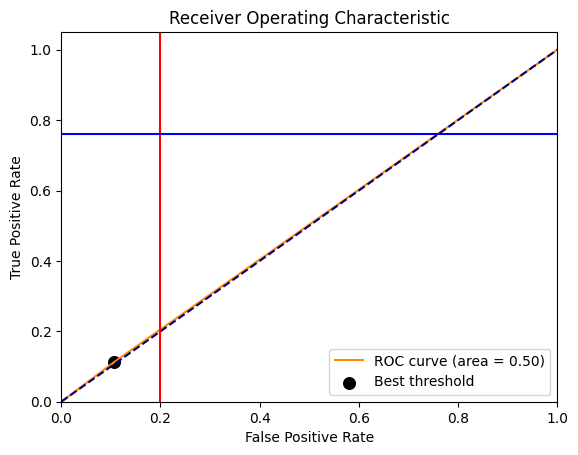

Accuracy: 88.27 %
[[21103  2508]
 [  301    38]]
              precision    recall  f1-score   support

           0      0.986     0.894     0.938     23611
           1      0.015     0.112     0.026       339

    accuracy                          0.883     23950
   macro avg      0.500     0.503     0.482     23950
weighted avg      0.972     0.883     0.925     23950



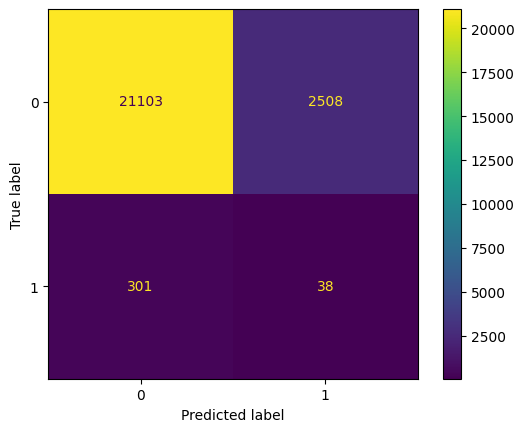

In [19]:
# Build SMOTE SRF model
rf = RandomForestClassifier(n_estimators=100, max_depth=100, class_weight='balanced', random_state=42, n_jobs=-1)

# Train SMOTE SRF
rf.fit(X_train_resampled, y_train_resampled)

# SMOTE SRF prediction result
y_pred = rf.predict(X_test)

# Performance matrix
create_roc_curve(y_test=y_test, y_pred=y_pred)
evaluate_rfc(rf, y_test=y_test, y_pred=y_pred)

## Tuning of max-depth

### n_estimators=100, max_depth=80, class_weight='balanced_subsample'

roc_auc_score for RandomForestClassifier:  0.502788123479769
Best threshold: 1


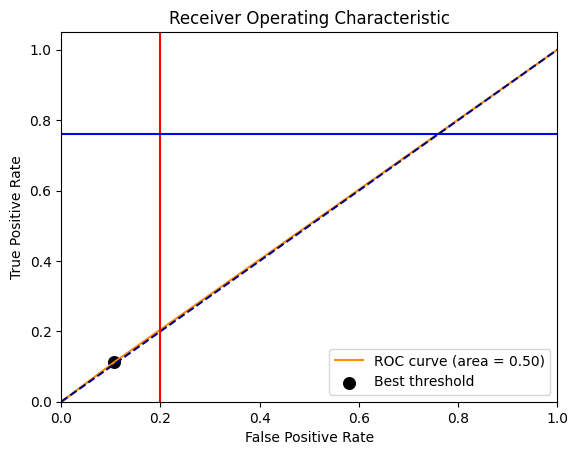

Accuracy: 88.24 %
[[21096  2515]
 [  301    38]]
              precision    recall  f1-score   support

           0      0.986     0.893     0.937     23611
           1      0.015     0.112     0.026       339

    accuracy                          0.882     23950
   macro avg      0.500     0.503     0.482     23950
weighted avg      0.972     0.882     0.925     23950



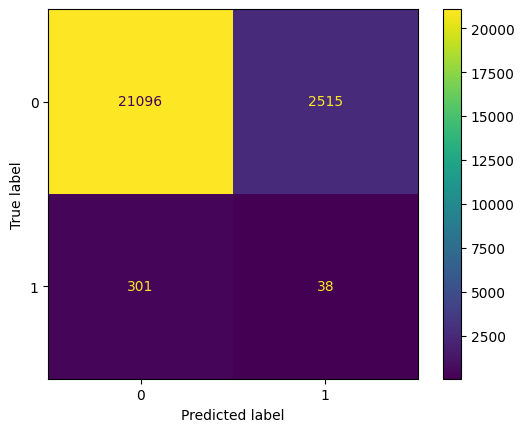

In [21]:
# Build SMOTE SRF model
rf = RandomForestClassifier(n_estimators=100, max_depth=80, class_weight='balanced_subsample', random_state=42, n_jobs=-1)

# Train SMOTE SRF
rf.fit(X_train_resampled, y_train_resampled)

# SMOTE SRF prediction result
y_pred = rf.predict(X_test)

# Performance matrix
create_roc_curve(y_test=y_test, y_pred=y_pred)
evaluate_rfc(rf, y_test=y_test, y_pred=y_pred)

### n_estimators=100, max_depth=120, class_weight='balanced_subsample'

roc_auc_score for RandomForestClassifier:  0.5045806982870965
Best threshold: 1


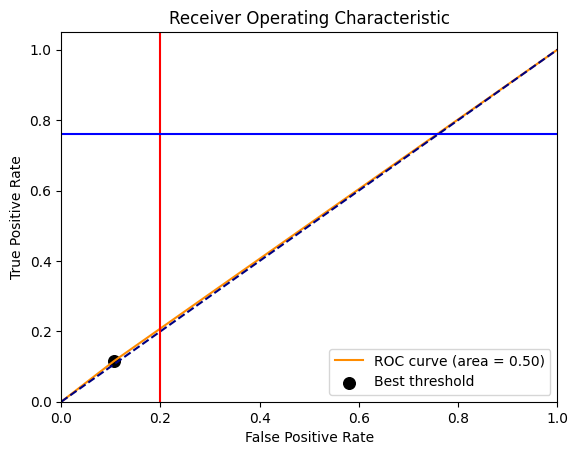

Accuracy: 88.31 %
[[21111  2500]
 [  300    39]]
              precision    recall  f1-score   support

           0      0.986     0.894     0.938     23611
           1      0.015     0.115     0.027       339

    accuracy                          0.883     23950
   macro avg      0.501     0.505     0.482     23950
weighted avg      0.972     0.883     0.925     23950



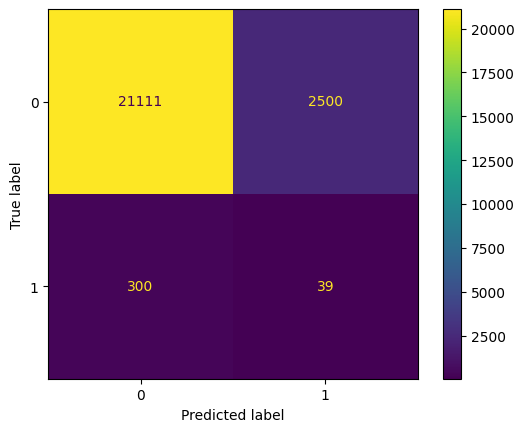

In [22]:
# Build SMOTE SRF model
rf = RandomForestClassifier(n_estimators=100, max_depth=120, class_weight='balanced_subsample', random_state=42, n_jobs=-1)

# Train SMOTE SRF
rf.fit(X_train_resampled, y_train_resampled)

# SMOTE SRF prediction result
y_pred = rf.predict(X_test)

# Performance matrix
create_roc_curve(y_test=y_test, y_pred=y_pred)
evaluate_rfc(rf, y_test=y_test, y_pred=y_pred)

## Tuning of n_estimators

### n_estimators=200, max_depth=100, class_weight='balanced_subsample'

roc_auc_score for RandomForestClassifier:  0.5114894450101941
Best threshold: 1


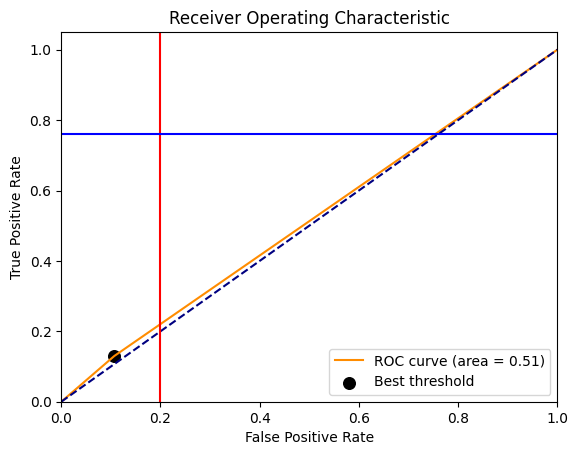

Accuracy: 88.24 %
[[21089  2522]
 [  295    44]]
              precision    recall  f1-score   support

           0      0.986     0.893     0.937     23611
           1      0.017     0.130     0.030       339

    accuracy                          0.882     23950
   macro avg      0.502     0.511     0.484     23950
weighted avg      0.972     0.882     0.925     23950



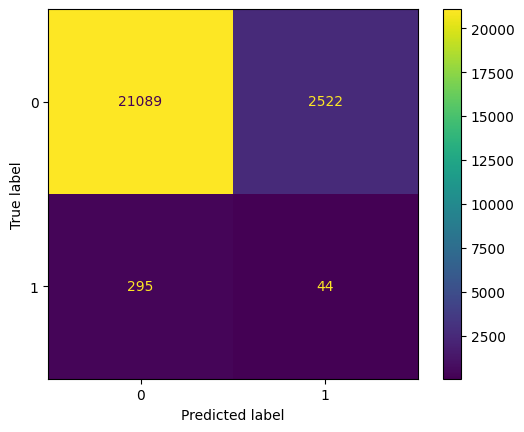

In [5]:
# Build SMOTE SRF model
rf = RandomForestClassifier(n_estimators=200, max_depth=100, class_weight='balanced_subsample', random_state=42, n_jobs=-1)

# Train SMOTE SRF
rf.fit(X_train_resampled, y_train_resampled)

# SMOTE SRF prediction result
y_pred = rf.predict(X_test)

# Performance matrix
create_roc_curve(y_test=y_test, y_pred=y_pred)
evaluate_rfc(rf, y_test=y_test, y_pred=y_pred)

### n_estimators=300, max_depth=100, class_weight='balanced_subsample'

roc_auc_score for RandomForestClassifier:  0.5129855478341241
Best threshold: 1


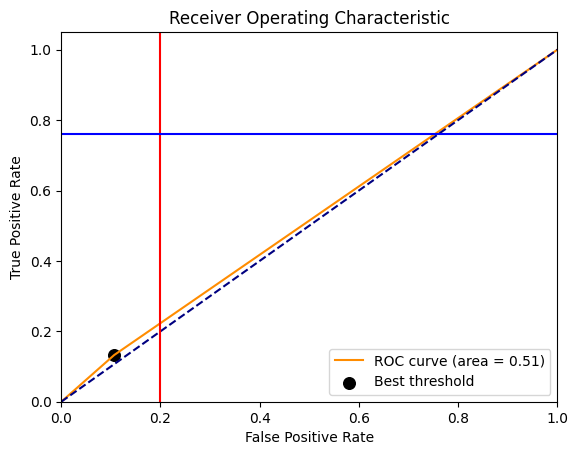

Accuracy: 88.25 %
[[21090  2521]
 [  294    45]]
              precision    recall  f1-score   support

           0      0.986     0.893     0.937     23611
           1      0.018     0.133     0.031       339

    accuracy                          0.882     23950
   macro avg      0.502     0.513     0.484     23950
weighted avg      0.973     0.882     0.925     23950



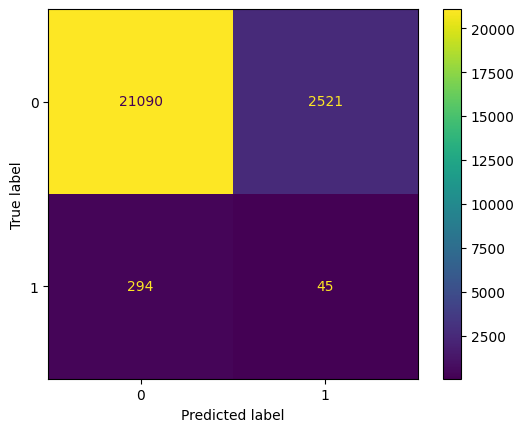

In [6]:
# Build SMOTE SRF model
rf = RandomForestClassifier(n_estimators=300, max_depth=100, class_weight='balanced_subsample', random_state=42, n_jobs=-1)

# Train SMOTE SRF
rf.fit(X_train_resampled, y_train_resampled)

# SMOTE SRF prediction result
y_pred = rf.predict(X_test)

# Performance matrix
create_roc_curve(y_test=y_test, y_pred=y_pred)
evaluate_rfc(rf, y_test=y_test, y_pred=y_pred)